<a href="https://colab.research.google.com/github/vincent51689453/Tensorflow2_Playground/blob/master/02_Function_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary python libraries**

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Setup basic training parameters

In [137]:
training_epochs = 2000
num_examples = 5000
test_fraction = 0.75

np.random.seed(1000)

Create a 11-hidden layers MLP

*Try use different number of layers

In [131]:
model = Sequential()

neurons = 50

model.add(Dense(1, input_dim=1, activation='tanh', kernel_initializer='random_normal'))



model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))




model.add(Dense(1, input_dim=1, activation='tanh', kernel_initializer='random_normal'))

Testing function

>$y=A\times sin(2\times \pi \times t^2)$

In [56]:
def f(x):
  return np.sin(2*np.pi*x**2 )+ 0.1*np.random.randn(x.shape[0])

Raw data generation (with noise)

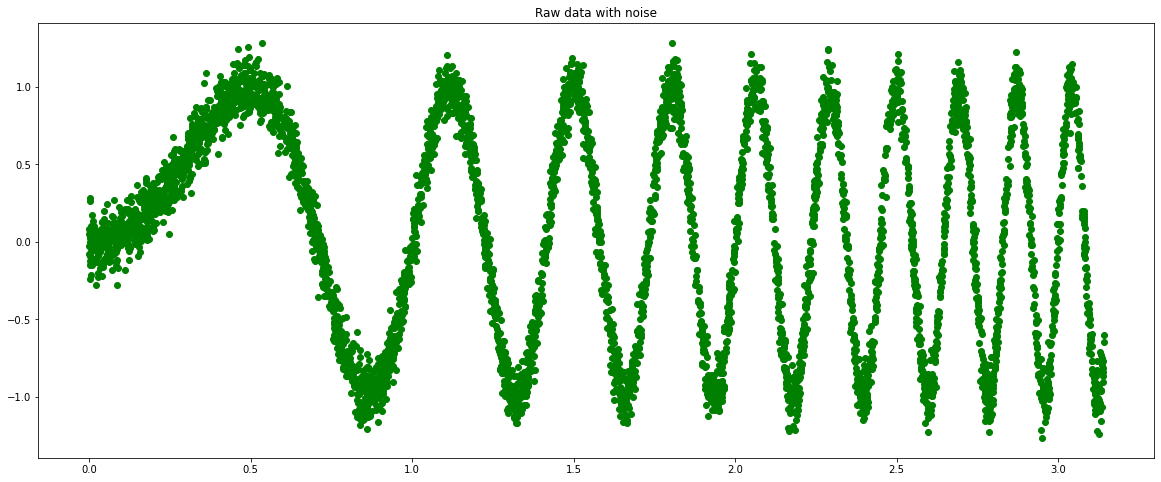

In [142]:
#np.random.unitorm(low,high,size)
all_x = np.random.uniform(0*np.pi, np.pi, num_examples).T
fig = plt.figure(figsize=(20,8))
plt.title('Raw data with noise')
plt.scatter(all_x, f(all_x), color='g')

Prepare training and testing dataset

In [58]:
np.random.shuffle(all_x)
train_size = int(num_examples*test_fraction)

# Partition data
x_training = all_x[:train_size]
x_testing = all_x[train_size:]
y_training = f(x_training)
y_testing = f(x_testing)

Plot the testing and training data

<Figure size 432x288 with 0 Axes>

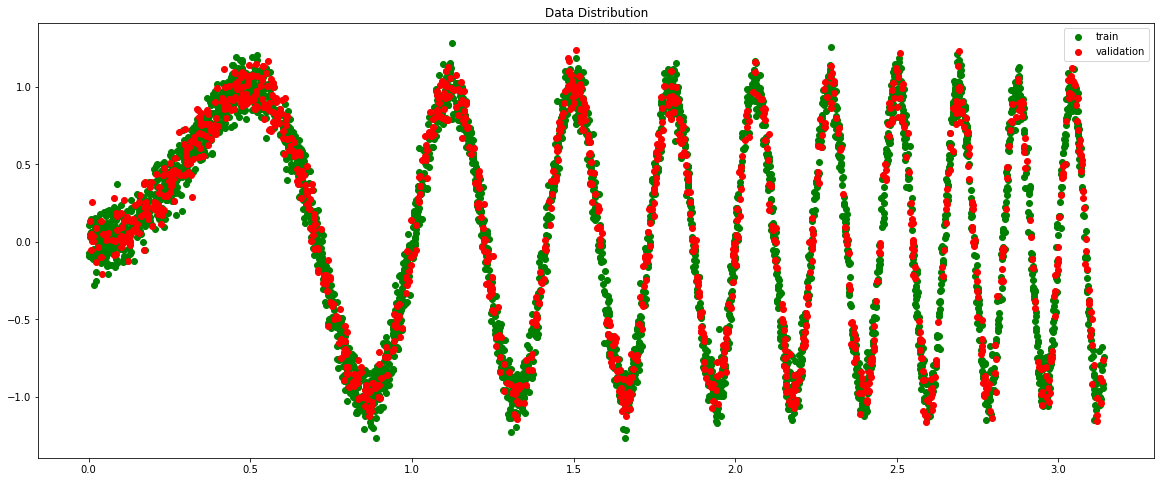

In [141]:
plt.figure(1)
fig = plt.figure(figsize=(20,8))
plt.title('Data Distribution')
plt.scatter(x_training, y_training, c='green', label='train')
plt.scatter(x_testing, y_testing, c='red', label='validation')
plt.legend()

Starts training

In [138]:
loss_function = tf.keras.losses.MeanSquaredError()

model.compile(loss=loss_function, optimizer='adam')



Fitting the data to the training data sets

Epoch 1/2000
4/4 - 0s - loss: 0.3238
Epoch 2/2000
4/4 - 0s - loss: 0.2900
Epoch 3/2000
4/4 - 0s - loss: 0.2719
Epoch 4/2000
4/4 - 0s - loss: 0.2317
Epoch 5/2000
4/4 - 0s - loss: 0.2291
Epoch 6/2000
4/4 - 0s - loss: 0.2146
Epoch 7/2000
4/4 - 0s - loss: 0.2093
Epoch 8/2000
4/4 - 0s - loss: 0.2017
Epoch 9/2000
4/4 - 0s - loss: 0.2006
Epoch 10/2000
4/4 - 0s - loss: 0.2002
Epoch 11/2000
4/4 - 0s - loss: 0.1989
Epoch 12/2000
4/4 - 0s - loss: 0.1975
Epoch 13/2000
4/4 - 0s - loss: 0.1981
Epoch 14/2000
4/4 - 0s - loss: 0.1978
Epoch 15/2000
4/4 - 0s - loss: 0.1980
Epoch 16/2000
4/4 - 0s - loss: 0.1963
Epoch 17/2000
4/4 - 0s - loss: 0.1963
Epoch 18/2000
4/4 - 0s - loss: 0.1979
Epoch 19/2000
4/4 - 0s - loss: 0.1973
Epoch 20/2000
4/4 - 0s - loss: 0.1976
Epoch 21/2000
4/4 - 0s - loss: 0.1967
Epoch 22/2000
4/4 - 0s - loss: 0.1969
Epoch 23/2000
4/4 - 0s - loss: 0.1958
Epoch 24/2000
4/4 - 0s - loss: 0.1958
Epoch 25/2000
4/4 - 0s - loss: 0.1957
Epoch 26/2000
4/4 - 0s - loss: 0.1966
Epoch 27/2000
4/4 - 0

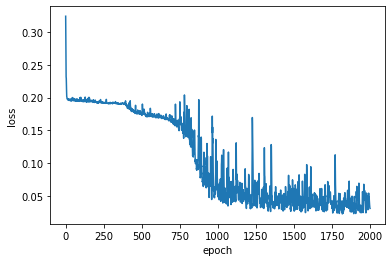

In [139]:
# fit the model on the training dataset
history = model.fit(x_training, y_training, epochs=training_epochs, batch_size=1000, verbose=2)

print()
print("History keys are following: ")
print(history.history.keys())
print()

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Test the result

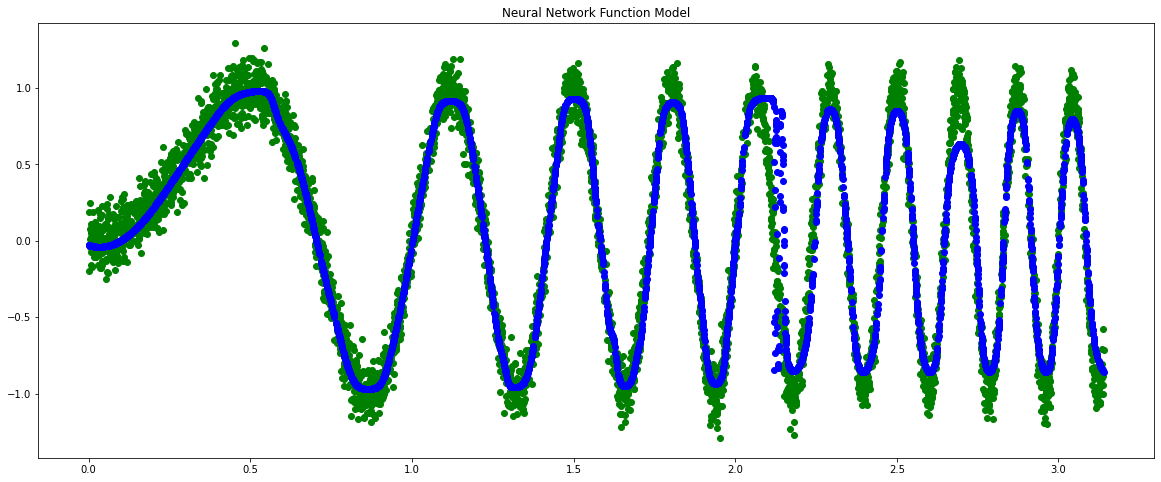

In [140]:
y_pred = model.predict(all_x)

fig = plt.figure(figsize=(20,8))
plt.title('Neural Network Function Model')
plt.scatter(all_x,f(all_x), color='g', label='Experimental Data')
plt.scatter(all_x,y_pred, color='b', label='AI Prediction')